In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Läs in filerna med korrekta filnamn
df1 = pd.read_csv(r'C:\Users\ashka\Documents\Dataset\2000-2009 Movies Box Office Collection.csv')
df2 = pd.read_csv(r'C:\Users\ashka\Documents\Dataset\2010-2024 Movies Box Office Collection.csv')
df3 = pd.read_csv(r'C:\Users\ashka\Documents\Dataset\2024 Movies Box Office Collection.csv')

# Kombinera alla dataset till en enda DataFrame
df = pd.concat([df1, df2, df3], ignore_index=True)

# Inspektera den kombinerade DataFrame
df.head()


# print(df.dtypes) visar att våra värden inte var numeriska utan objektiva
# vi var tvungen att korrigera de för att de skulle vara presentabelt.

,Unnamed: 0,Release Group,Worldwide,Domestic,Domestic_percent,Foreign,Foreign_percent,year,Rank
0,0.0,Mission: Impossible II,"54,63,88,108","21,54,09,889",39.40%,"33,09,78,219",60.60%,2000,NaN
1,1.0,Gladiator,"46,05,83,960","18,77,05,427",40.80%,"27,28,78,533",59.20%,2000,NaN
2,2.0,Cast Away,"42,96,32,142","23,36,32,142",54.40%,"19,60,00,000",45.60%,2000,NaN
3,3.0,What Women Want,"37,41,11,707","18,28,11,707",48.90%,"19,13,00,000",51.10%,2000,NaN
4,4.0,Dinosaur,"34,98,22,765","13,77,48,063",39.40%,"21,20,74,702",60.60%,2000,NaN


In [7]:
# Konvertera Domestic och Foreign till numeriska värden
df['Worldwide'] = pd.to_numeric(df['Worldwide'].str.replace(',', '').str.replace('$', ''), errors='coerce')
df['Domestic'] = pd.to_numeric(df['Domestic'].str.replace(',', '').str.replace('$', ''), errors='coerce')
df['Foreign'] = pd.to_numeric(df['Foreign'].str.replace(',', '').str.replace('$', ''), errors='coerce')

print(df[['Worldwide', 'Domestic', 'Foreign']].head())

   Worldwide   Domestic    Foreign
0  546388108  215409889  330978219
1  460583960  187705427  272878533
2  429632142  233632142  196000000
3  374111707  182811707  191300000
4  349822765  137748063  212074702


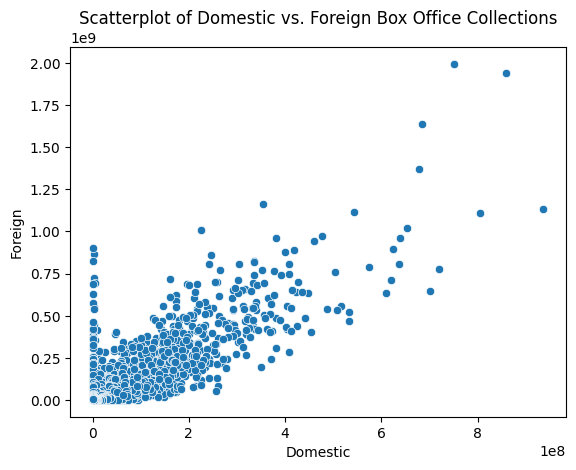

In [8]:
# Scatterplott
# Plotta Domestic vs. Foreign intäkter
sns.scatterplot(x='Domestic', y='Foreign', data=df)
plt.title('Scatterplot of Domestic vs. Foreign Box Office Collections')
plt.show()

In [4]:
# Data för top 3 filmer
highest_worldwide = df.loc[df['Worldwide'].idxmax()]
print("Filmen med högst totala intäkter (Worldwide):")
print(highest_worldwide[['Release Group', 'Worldwide']])

highest_domestic = df.loc[df['Domestic'].idxmax()]
print("\nFilmen med högst inhemska intäkter (Domestic):")
print(highest_domestic[['Release Group', 'Domestic']])

highest_foreign = df.loc[df['Foreign'].idxmax()]
print("\nFilmen med högst utländska intäkter (Foreign):")
print(highest_foreign[['Release Group', 'Foreign']])

Filmen med högst totala intäkter (Worldwide):
Release Group    Avengers: Endgame
Worldwide               2799439100
Name: 3800, dtype: object

Filmen med högst inhemska intäkter (Domestic):
Release Group    Star Wars: Episode VII 0 The Force Awakens
Domestic                                          936662225
Name: 3000, dtype: object

Filmen med högst utländska intäkter (Foreign):
Release Group        Avatar
Foreign          1993811448
Name: 1800, dtype: object


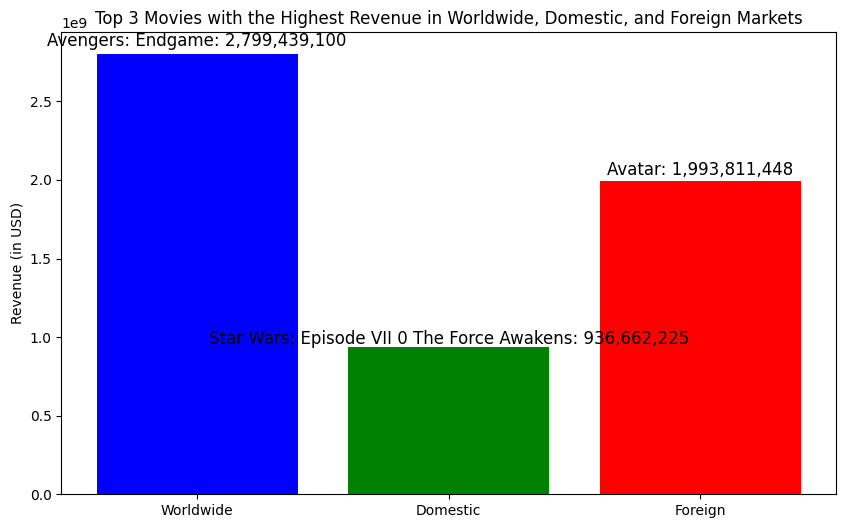

In [5]:
# Stapeldiagram
# Data för top 3 filmer
categories = ['Worldwide', 'Domestic', 'Foreign']
values = [
    highest_worldwide['Worldwide'],
    highest_domestic['Domestic'],
    highest_foreign['Foreign']
]
films = [
    highest_worldwide['Release Group'],
    highest_domestic['Release Group'],
    highest_foreign['Release Group']
]

# Skapa ett stapeldiagram
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color=['blue', 'green', 'red'])

# Lägg till etiketter
for i, value in enumerate(values):
    plt.text(i, value + value*0.02, f'{films[i]}: {value:,.0f}', ha='center', fontsize=12)

plt.title('Top 3 Movies with the Highest Revenue in Worldwide, Domestic, and Foreign Markets')
plt.ylabel('Revenue (in USD)')
plt.show()

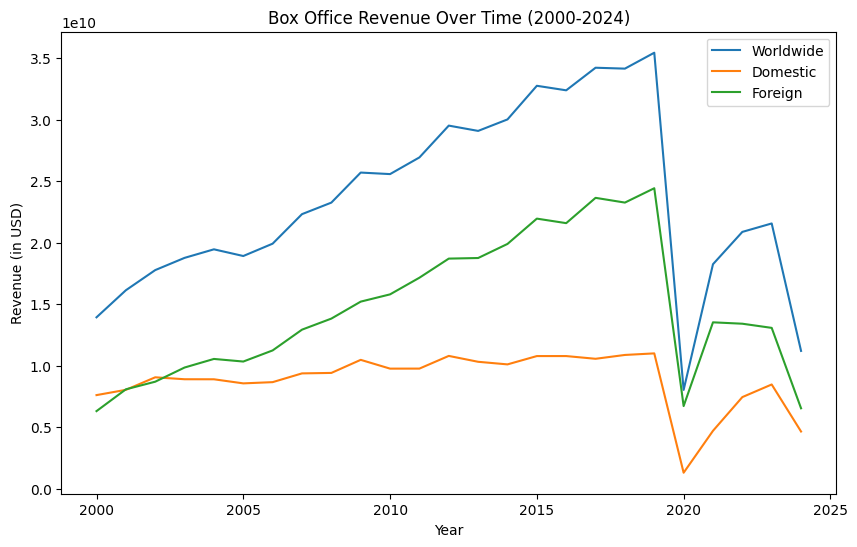

In [13]:
# Linjediagram
# hur de globala, inhemska och utländska intäkterna har utvecklats över tid. 
yearly_revenue = df.groupby('year')[['Worldwide', 'Domestic', 'Foreign']].sum()
yearly_revenue.plot(kind='line', figsize=(10, 6))
plt.title('Box Office Revenue Over Time (2000-2024)')
plt.ylabel('Revenue (in USD)')
plt.xlabel('Year')
plt.show()
